In [1]:
import numpy as np
import simpy
import seaborn
import matplotlib.pyplot as plt


In [2]:
class Pacjent:
    def __init__(self, id):
        self.id = id
        self.arrival_time = None
        self.service_start_time = None
        self.service_end_time = None

In [3]:
class Gabinet:
    def __init__(self, id, env):
        self.id = id
        self.env = env
        self.patients_served = 0

In [4]:
class Clinic:
    def __init__(self, env, number_of_rooms, service_time, lambda_per_hour=14):
        self.curr_patient_id = 1
        self.env = env
        self.service_time = service_time
        self.lambda_per_hour = lambda_per_hour

        self.list_rooms = [Gabinet(id=i + 1, env=self.env) for i in range(number_of_rooms)]
        self.rooms = simpy.Store(self.env, capacity=3)
        for room in self.list_rooms:
            self.rooms.put(room)
        self.processed_patients = []

    def generate_patients(self):

        def time_between_new_patients():
            return np.random.poisson(self.lambda_per_hour)

        while True:
            patient = Pacjent(id=self.curr_patient_id)
            patient.arrival_time = self.env.now
            print(f"Czas {self.env.now}: Patient {patient.id} arrives")
            self.env.process(self.serve_patient(patient))
            self.curr_patient_id += 1
            yield self.env.timeout(time_between_new_patients())
            
    def serve_patient(self, patient):
        room = yield self.rooms.get()
        print(f"Czas {self.env.now}: Patient {patient.id} enters Room {room.id} ")

        yield self.env.timeout(self.service_time)

        patient.service_end_time = self.env.now
        room.patients_served += 1
        print(f"Czas {self.env.now}: Patient {patient.id} leaves Room {room.id}")
        self.processed_patients.append(patient)
        yield self.rooms.put(room)
        
    def run(self, sim_time):
        self.env.process(self.generate_patients())
        env.run(until=sim_time)
        
    def stats(self):
        def patient_bar_plot():
            patients_served_ls = []
            id_ls = []
            for room in self.list_rooms:
                patients_served_ls.append(room.patients_served)
                id_ls.append(room.id)
            seaborn.barplot(x=id_ls, y=patients_served_ls)
            plt.show()

        patient_bar_plot()

In [5]:
env = simpy.Environment()

In [6]:
clinic = Clinic(env, number_of_rooms=3, service_time=15)

In [7]:
clinic.run(420)

Czas 0: Patient 1 arrives
Czas 0: Patient 1 enters Room 1 
Czas 15: Patient 1 leaves Room 1
Czas 18: Patient 2 arrives
Czas 18: Patient 2 enters Room 2 
Czas 30: Patient 3 arrives
Czas 30: Patient 3 enters Room 3 
Czas 33: Patient 2 leaves Room 2
Czas 45: Patient 3 leaves Room 3
Czas 48: Patient 4 arrives
Czas 48: Patient 4 enters Room 1 
Czas 63: Patient 5 arrives
Czas 63: Patient 4 leaves Room 1
Czas 63: Patient 5 enters Room 2 
Czas 75: Patient 6 arrives
Czas 75: Patient 6 enters Room 3 
Czas 78: Patient 5 leaves Room 2
Czas 89: Patient 7 arrives
Czas 89: Patient 7 enters Room 1 
Czas 90: Patient 6 leaves Room 3
Czas 104: Patient 7 leaves Room 1
Czas 106: Patient 8 arrives
Czas 106: Patient 8 enters Room 2 
Czas 121: Patient 8 leaves Room 2
Czas 122: Patient 9 arrives
Czas 122: Patient 9 enters Room 3 
Czas 131: Patient 10 arrives
Czas 131: Patient 10 enters Room 1 
Czas 137: Patient 9 leaves Room 3
Czas 146: Patient 10 leaves Room 1
Czas 147: Patient 11 arrives
Czas 147: Patient 11

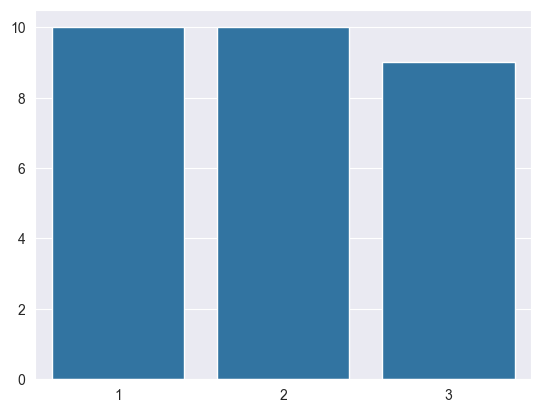

In [8]:
clinic.stats()